,date
0,1923
1,1553
2,1896
3,1902
4,1915
...,...
8105,1938
8106,1934
8107,1906
8108,1846


547


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4efee0ba8>]],
      dtype=object)

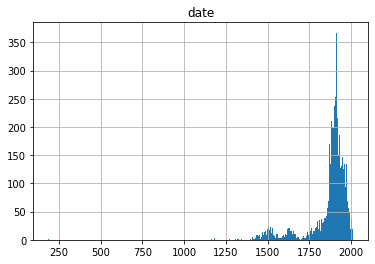

In [12]:
import pandas as pd

df = pd.read_csv('train_1_info.csv')
df.drop(columns=['filename'], inplace=True)
display(df)
print(df['date'].nunique())
hist = df.hist(bins=df['date'].nunique())
hist